In [5]:
import pandas as pd

In [7]:
df = pd.read_excel("../data/raw/raport.xlsx")


In [8]:
df.head()

,I.I.,Lp.,PESEL,w PACS,Mężczyzna,Unnamed: 5,Unnamed: 6,low-energy trauma,high-energy trauma,brak wywiadu urazowego,...,instrumentarium,wertebroplastyka,Kontrola,RTG,Data Badania,TK,Data Badania,MR,Data Badania .1,Uwagi.1
0,M.M.,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,1,08.05.2020 21.05.2020 04.06.2020 16.06.2020 28...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K.I.,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1,14.02.2020 06.03.2020 30.04.2020,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['I.I.', 'Lp.', 'PESEL', 'w PACS', 'Mężczyzna', 'Unnamed: 5',
       'Unnamed: 6', 'low-energy trauma', 'high-energy trauma ',
       'brak wywiadu urazowego', 'RTG', 'Th', 'LS', 'Data badania', 'TK',
       'TK multitrauma', 'Th.1', 'LS.1', 'klp C-', 'klp C+', 'jb C-', 'jb C+',
       'SOR', 'Data badania.1', 'Poziom', 'A0', 'A1', 'A2', 'A3', 'A4', 'B1',
       'B2', 'B3', 'C', 'contiguous', 'gaz  w trzonie', 'SD',
       'pre-DISH ze złamaniem', 'pre-DISH poza złamaniem', 'DISH ze złamaniem',
       'DISH poza złamaniem', 'ZZSK', 'inne', 'charakteryzacja ', 'Uwagi',
       'operacja', 'instrumentarium', 'wertebroplastyka ', 'Kontrola ', 'RTG ',
       'Data Badania', 'TK ', 'Data Badania ', 'MR', 'Data Badania .1',
       'Uwagi.1'],
      dtype='object')

In [10]:
columns_of_interest = ['I.I.', 'Poziom', 'A0', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C', 'Mężczyzna']
df_trimmed = df[columns_of_interest].copy()

records = []
current_traumas = []
current_gender = None
current_ii = None

df_trimmed


,I.I.,Poziom,A0,A1,A2,A3,A4,B1,B2,B3,C,Mężczyzna
0,M.M.,L1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1,NaN,L2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,L4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,L5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K.I.,L1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for _, row in df_trimmed.iterrows():
    if pd.notna(row['I.I.']):
        if current_traumas:
            records.append({
                "I.I": f"{current_ii}",
                "is_man": current_gender,
                "traumas": current_traumas
            })
        current_gender = bool(row['Mężczyzna'])
        current_traumas = []
        current_ii = row['I.I.']

    if pd.notna(row['Poziom']):
        level = row['Poziom']
        for trauma_type in ['A0', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C']:
            if pd.notna(row[trauma_type]):
                current_traumas.append((level, trauma_type))

if current_traumas:
    records.append({
        "I.I": f"I.I. {current_ii}",
        "is_man": current_gender,
        "traumas": current_traumas
    })


In [12]:
records_df = pd.DataFrame(records)
records_df.head()

,I.I,is_man,traumas
0,M.M.,True,"[(L1, A4), (L2, A1), (L4, A1), (L5, A1)]"
1,K.I.,False,"[(L1, A1)]"
2,B.W.,True,"[(L1, A3)]"
3,P.E.,False,"[(L1, A1)]"
4,S.T.,False,"[(Th12, A3)]"


In [13]:
records_df.dtypes

I.I        object
is_man       bool
traumas    object
dtype: object

In [18]:
all_pairs = records_df.explode('traumas')['traumas']
all_pairs

0           (L1, A4)
0           (L2, A1)
0           (L4, A1)
0           (L5, A1)
1           (L1, A1)
           ...      
371     (Th12/L1, C)
372    (Th2/Th3, B2)
372        (Th3, A1)
372         (L5, A0)
373         (L3, A1)
Name: traumas, Length: 614, dtype: object

In [15]:
from collections import Counter

In [19]:
first_elements = Counter([x[0] for x in all_pairs])
second_elements = Counter([x[1] for x in all_pairs])

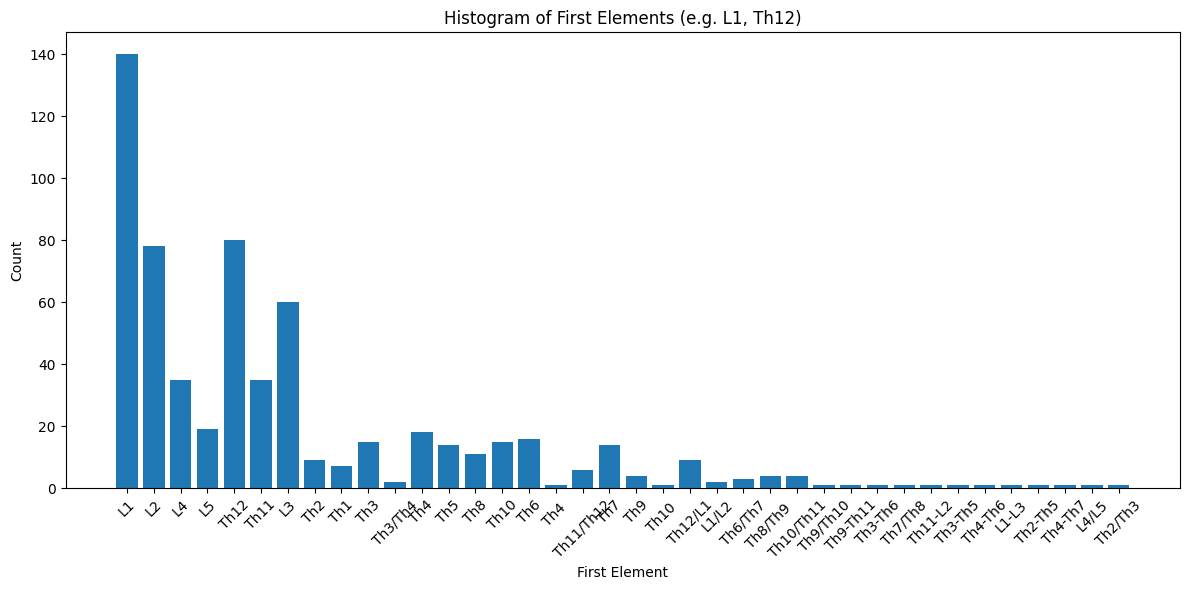

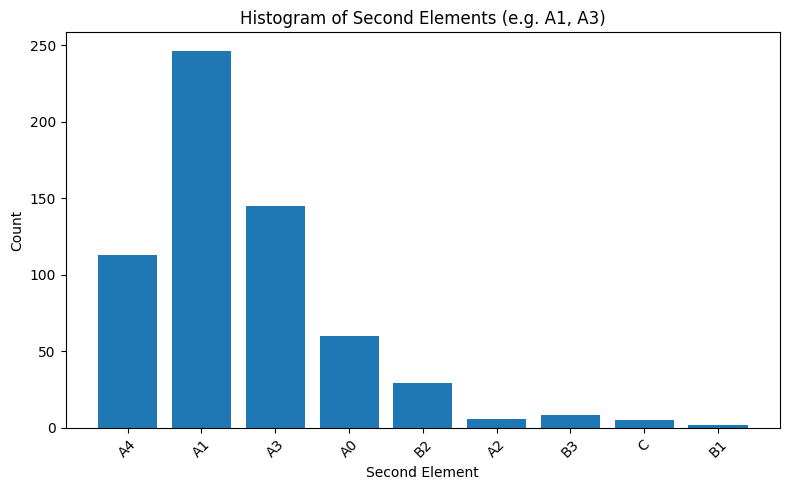

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(first_elements.keys(), first_elements.values())
plt.title("Histogram of First Elements (e.g. L1, Th12)")
plt.xlabel("First Element")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(second_elements.keys(), second_elements.values())
plt.title("Histogram of Second Elements (e.g. A1, A3)")
plt.xlabel("Second Element")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()